In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-price-germany-2019/housing_price_ge19.csv
/kaggle/input/housing-price-germany-2019/housing_price_ge19.csv


Data import

In [2]:
df = pd.read_csv("/kaggle/input/housing-price-germany-2019/housing_price_ge19.csv")
print(f'Shape of Data is : {df.shape[0]} rows and {df.shape[1]} columns')

Shape of Data is : 1728 rows and 17 columns


Definition

In [3]:
def summary_report(data):
  r, c = data.shape
  t_sparce = 0
  t_nunique = 0
  for n in data.columns:
    col = data[n]
    sparce = round(round(col.isna().sum() / r, 2) * 100, 2)
    nunique = col.nunique()

    t_sparce = t_sparce + sparce
    t_nunique = t_nunique + nunique

    print(str(n) + " is " + str(sparce) + "% empty. (" + str(data[n].isna().sum()) + " null values)")
    print(f"The column has " + str(nunique) + " unique elements.")
    print("\n")

  data.info()
  print(f"The shape of the dataset is " + str(r) + " rows and " + str(c) + " columns.")
  print(f"The dataset is " + str(round(t_sparce / c, 2)) + "% sparse and contains " + str(t_nunique) + " unique elements." )

Data visualization

In [4]:
df.describe()

,Number,Price,Lot_Size,Waterfront,Age,Land_Value,New_Construct,Central_Air,Living_Area,Pct_College,Bedrooms,Fireplaces,Bathrooms,Rooms
count,1728.000000,1728.000000,1728.000000,1728.000000,1648.000000,1647.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1330.000000,1728.000000,1728.000000
mean,864.500000,211966.705440,0.500214,0.008681,27.956311,34324.905889,0.046875,0.367477,1754.975694,55.567708,3.154514,0.603008,1.900174,7.041667
std,498.974949,98441.391015,0.698680,0.092791,29.208179,35075.035326,0.211432,0.482257,619.935553,10.333581,0.817351,0.551616,0.658352,2.316453
min,1.000000,5000.000000,0.000000,0.000000,0.000000,200.000000,0.000000,0.000000,616.000000,20.000000,1.000000,0.000000,0.000000,2.000000
25%,432.750000,145000.000000,0.170000,0.000000,13.000000,15100.000000,0.000000,0.000000,1300.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,864.500000,189900.000000,0.370000,0.000000,19.000000,25000.000000,0.000000,0.000000,1634.500000,57.000000,3.000000,1.000000,2.000000,7.000000
75%,1296.250000,259000.000000,0.540000,0.000000,34.000000,39650.000000,0.000000,1.000000,2137.750000,64.000000,4.000000,1.000000,2.500000,8.250000
max,1728.000000,775000.000000,12.200000,1.000000,225.000000,412600.000000,1.000000,1.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000


In [5]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# Encode the categorical and ordinal variables
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
df['Heat_Type'] = label_encoder.fit_transform(df['Heat_Type'])
df['Sewer_Type'] = label_encoder.fit_transform(df['Sewer_Type'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

ValueError: num must be 1 <= num <= 14, not 15

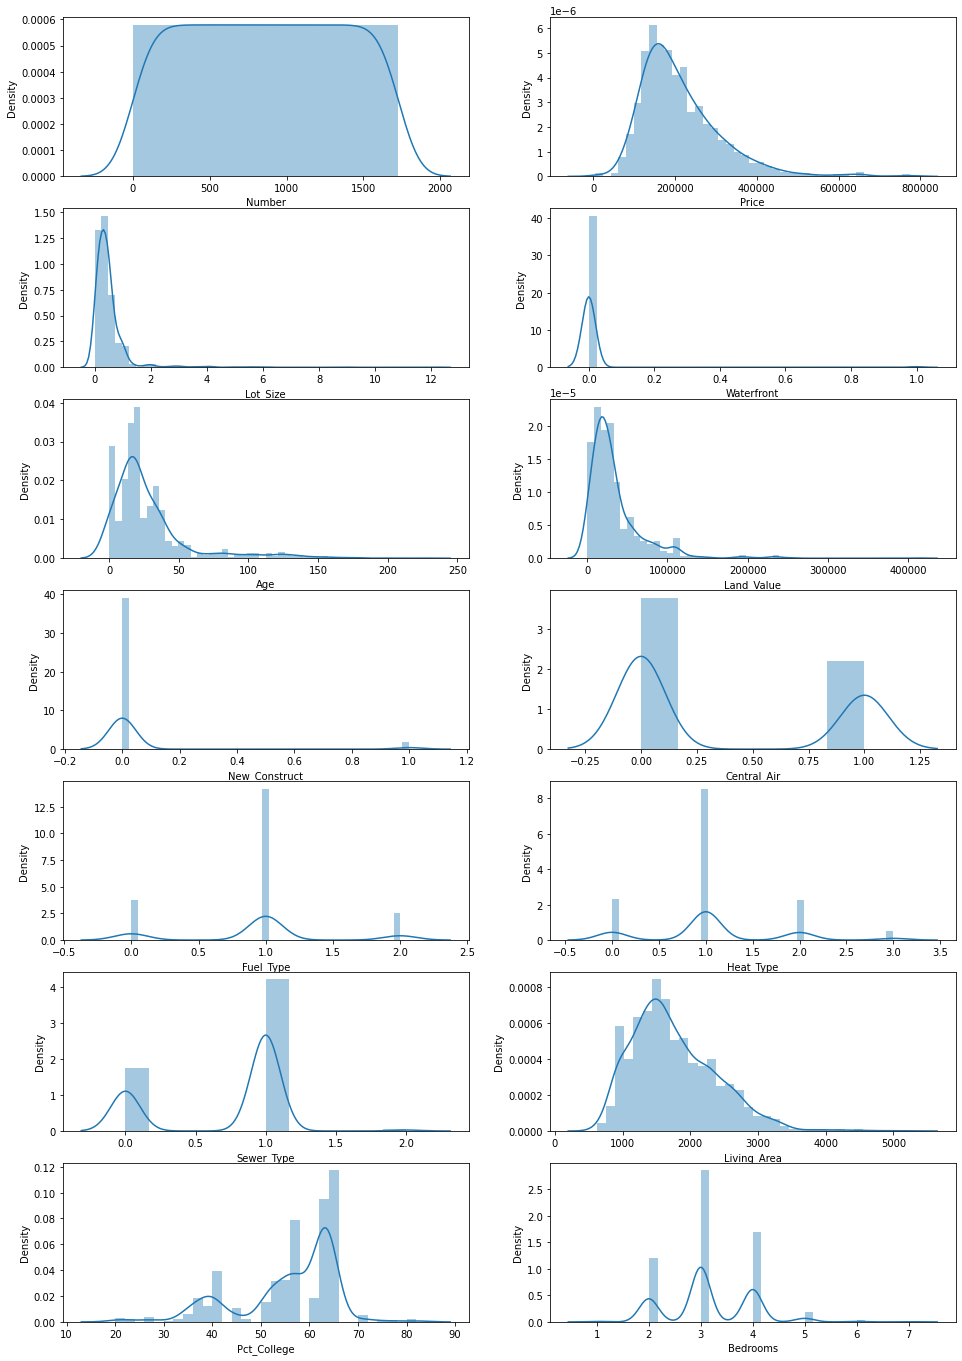

In [6]:
# Lets look at the distribution plot of the features
pos = 1
fig = plt.figure(figsize=(16,24))
for i in df.columns:
    ax = fig.add_subplot(7,2,pos)
    pos = pos + 1
    sns.distplot(df[i],ax=ax)

In [ ]:
summary_report(df)

In [ ]:
# Lets look at the correlation matrix of our data.
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
sns.heatmap(df.corr(),annot=True)

Observation:

There is strong positive colinearity between Price, Living_Area and Bathrooms which makes sense. Bigger areas and more bathrooms cost higher. There is also a strong positive association between Living_Area, Rooms, Bathrooms, Bedrooms. More Space = more rooms = more bathrooms = more bedrooms.

Action:

I will cap some of the outliers and drop Number, Lot_Size, Waterfront, Age, Land_Value, New_Construct, Central_Air, Fuel_Type, Sewer_Type, Pct_College and Fireplaces because for living spaces we only need to focus on total of Living_Area, Bedrooms, Bathrooms and Rooms. More houses will be baked into how many total bedrooms there are so I am not losing any information.

In [ ]:

droplist = ["Number","Lot_Size","Waterfront","Age","Land_Value","New_Construct","Central_Air","Fuel_Type","Heat_Type","Sewer_Type","Pct_College","Fireplaces","Bedrooms"]

df.drop(columns=droplist,inplace=True)

In [ ]:
for col in df.columns:

  q_low = df[col].quantile(.1)
  q_hi  = df[col].quantile(.9)

  df = df[(df[col] < q_hi) & (df[col] > q_low)]

Now that we have gone through and dropped the bottom and top 10% we get a much more accurate variety of data.

In [ ]:
# Lets look at the distribution plot of the features
pos = 1
fig = plt.figure(figsize=(16,24))
for i in df.columns:
    ax = fig.add_subplot(7,2,pos)
    pos = pos + 1
    sns.distplot(df[i],ax=ax)

Model Building

In [ ]:
# import libraries needed for this.
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# lets get the VIF value to understand the multi collinearity
vifdf = []
for i in df.columns:
    X = np.array(df.drop(i,axis=1))
    y = np.array(df[i])
    lr = LinearRegression()
    lr.fit(X,y)
    y_pred = lr.predict(X)
    r2 = r2_score(y,y_pred)
    vif = 1/(1-r2)
    vifdf.append((i,vif))

vifdf = pd.DataFrame(vifdf,columns=['Features','Variance Inflation Factor'])
vifdf.sort_values(by='Variance Inflation Factor')

In [ ]:
# Lets build our function which will perform the normaliztion
def rescale(X):
    mean = X.mean()
    std = X.std()
    scaled_X = [(i - mean)/std for i in X]
    return pd.Series(scaled_X)

In [ ]:
# We will build a new dataframe
df_std = pd.DataFrame(columns=df.columns)
for i in df.columns:
    df_std[i] = rescale(df[i])

In [ ]:
# Lets look at the descriptive stats now
df_std.describe().iloc[1:3:]

In [ ]:
# lets look at the shape of data after scaling
pos = 1
fig = plt.figure(figsize=(16,24))
for i in df_std.columns:
    ax = fig.add_subplot(7,2,pos)
    pos = pos + 1
    sns.distplot(df_std[i],ax=ax)

PCA

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

In [ ]:
df = df.reset_index()

In [ ]:
# import libraries for PCA
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=3)
X = df_std.drop('Price',axis=1)
X_pca = pca.fit_transform(X)
df_std_pca = pd.DataFrame(X_pca,columns=['PCA1','PCA2','PCA3'])
df_std_pca['Price'] = df_std['Price']

In [ ]:
# Lets look at the correlation matrix now.
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
sns.heatmap(df_std_pca.corr(),annot=True)

In [ ]:
# Lets look at the distribution of our features after applying PCA
pos = 1
fig = plt.figure(figsize=(16,24))
for i in df_std_pca.columns:
    ax = fig.add_subplot(7,2,pos)
    pos = pos + 1
    sns.distplot(df_std_pca[i],ax=ax)

Regression

In [ ]:
# import libraires needed to perform our Regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
# Split data into Training and testing
X = np.array(df_std_pca.drop('Price',axis=1))
y = np.array(df_std_pca['Price'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
for i in [X_train,X_test,y_train,y_test]:
    print("Shape of Data is {}".format(i.shape))

In [ ]:
# Lets train our model on training data and predict also on training to see results
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_train)
r2 = r2_score(y_train,y_pred)
rmse = np.sqrt(mean_squared_error(y_train,y_pred))
print('R-Squared Score is : {} | Root Mean Square Error is : {}'.format(r2,rmse))